In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
accidents = pd.read_csv('C:\imen\dps_challenge\monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')


In [3]:
accidents

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [4]:
accidents = accidents.iloc[:,[0,1,2,3,4]]

In [5]:
accidents = accidents.rename(columns= {'MONATSZAHL':'Category','AUSPRAEGUNG':'Accident-type','JAHR':'Year','MONAT':'Month','WERT':'Value'})


In [6]:
accidents

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN
...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


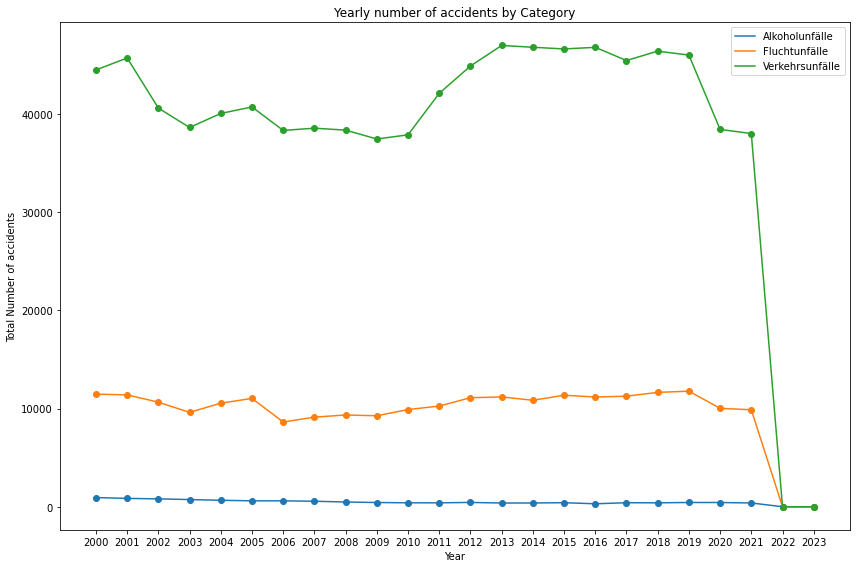

In [7]:
accidents_copy = accidents[accidents['Accident-type']=='insgesamt']
# Group by 'categorie', 'annee' (year), and sum the 'nombre_achat'
category_yearly = accidents_copy.groupby(['Category', accidents_copy['Year']])['Value'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over unique categories and plot the time series for each
for category in category_yearly['Category'].unique():
    category_data = category_yearly[category_yearly['Category'] == category]
    plt.plot(category_data['Year'], category_data['Value'], label=f'{category}')

    # Ajouter des points à chaque donnée pour chaque catégorie
    plt.scatter(category_data['Year'], category_data['Value'])

plt.xlabel('Year')
plt.ylabel('Total Number of accidents')
plt.title('Yearly number of accidents by Category')
plt.legend()
plt.tight_layout()

# Définir les étiquettes de l'axe des abscisses
plt.xticks(category_yearly['Year'].unique())  # Utilisez les valeurs uniques des années

# Show the plot
plt.show()



In [8]:
accidents= accidents[accidents['Year']<=2020]

In [9]:
accidents['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
      dtype=int64)

In [10]:
print(accidents.isnull().sum()) #Number of empty cells for each column


Category         0
Accident-type    0
Year             0
Month            0
Value            0
dtype: int64


In [11]:
print(accidents.duplicated().sum()) #verify_duplicate

0


In [12]:
accidents['Month'] = accidents['Month'].apply(lambda x: str(x)[4:6])


C:\Users\DELL\AppData\Local\Temp/ipykernel_20752/2170253102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Month'] = accidents['Month'].apply(lambda x: str(x)[4:6])


In [13]:
accidents

,Category,Accident-type,Year,Month,Value
36,Alkoholunfälle,insgesamt,2020,01,28.0
37,Alkoholunfälle,insgesamt,2020,02,40.0
38,Alkoholunfälle,insgesamt,2020,03,27.0
39,Alkoholunfälle,insgesamt,2020,04,26.0
40,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,08,647.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,09,675.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [14]:
accidents = pd.get_dummies(accidents,drop_first=True, columns=['Category','Accident-type']) 
accidents.head()

,Year,Month,Value,Category_Fluchtunfälle,Category_Verkehrsunfälle,Accident-type_insgesamt,Accident-type_mit Personenschäden
36,2020,01,28.0,0,0,1,0
37,2020,02,40.0,0,0,1,0
38,2020,03,27.0,0,0,1,0
39,2020,04,26.0,0,0,1,0
40,2020,05,40.0,0,0,1,0


In [15]:
accidents.rename(columns={'Accident-type_mit Personenschäden':'Accident-type_mitPersonenschäden' })

,Year,Month,Value,Category_Fluchtunfälle,Category_Verkehrsunfälle,Accident-type_insgesamt,Accident-type_mitPersonenschäden
36,2020,01,28.0,0,0,1,0
37,2020,02,40.0,0,0,1,0
38,2020,03,27.0,0,0,1,0
39,2020,04,26.0,0,0,1,0
40,2020,05,40.0,0,0,1,0
...,...,...,...,...,...,...,...
2011,2000,08,647.0,0,1,0,0
2012,2000,09,675.0,0,1,0,0
2013,2000,10,615.0,0,1,0,0
2014,2000,11,578.0,0,1,0,0


In [16]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 36 to 2015
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               1764 non-null   int64  
 1   Month                              1764 non-null   object 
 2   Value                              1764 non-null   float64
 3   Category_Fluchtunfälle             1764 non-null   uint8  
 4   Category_Verkehrsunfälle           1764 non-null   uint8  
 5   Accident-type_insgesamt            1764 non-null   uint8  
 6   Accident-type_mit Personenschäden  1764 non-null   uint8  
dtypes: float64(1), int64(1), object(1), uint8(4)
memory usage: 62.0+ KB


In [17]:
X = accidents.drop("Value", axis=1)
y = accidents["Value"]

In [18]:

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)
y_pred = random_forest_reg.predict(X)



In [19]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

43.42


In [20]:
data_to_predict = {
    'Category': ['Alkoholunfälle'],
    'Accident-type': ['insgesamt'],
    'Year': [2021],
    'Month': ['01']
}

input_data = pd.DataFrame(data_to_predict)

input_data = pd.get_dummies(input_data, drop_first=True, columns=['Category','Accident-type'])

missing_cols = set(X.columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0

input_data = input_data[X.columns]


predicted_value = random_forest_reg.predict(input_data)
print(predicted_value)

[11.67]


In [21]:
import pickle
data = {"model": random_forest_reg, "training_data": X}
with open('saved_steps.pkl', 'wb') as file: 
    pickle.dump(data, file)  
